# **Implementation of Hierarchical clustering**

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.DataFrame({
    'x1':[1, 1.5, 5, 3, 4, 3, 8, 7, 6, 1, 2],
    'x2':[1, 1.5, 5, 4, 4, 3.5,7, 8, 9, 4, 5]
})
data

,x1,x2
0,1.0,1.0
1,1.5,1.5
2,5.0,5.0
3,3.0,4.0
4,4.0,4.0
5,3.0,3.5
6,8.0,7.0
7,7.0,8.0
8,6.0,9.0
9,1.0,4.0


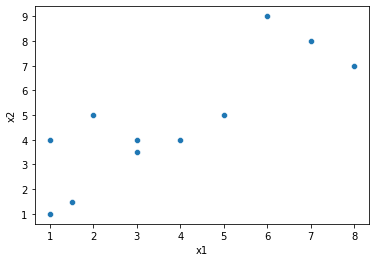

In [3]:
sns.scatterplot(x = data.x1, y = data.x2);

In [4]:
def get_cluster(mat, link):
    # list to store cluster values
    cluster_arr = [] 
    # dictionary to store all clusters
    cluster = {}
    row = col = 0
    
    cluster_arr = [i for i in range(mat.shape[0])]
    cluster[0] = cluster_arr.copy()
    
    for c in range(1, mat.shape[0]):
        # giving a random big value to min_val
        min_val = 1000000
        # loop to get the minimum value of distance matrix
        for i in range(mat.shape[0]):
            for j in range(mat.shape[0]):
                if mat[i,j] <= min_val:
                    min_val = mat[i,j]
                    row = i
                    col = j
        
        # for single linkage
        if link.lower() == 'single':
            for i in range(mat.shape[0]):
                if i != col and i != row:
                    val = min(mat[col, i], mat[row, i])
                    mat[col, i] = val
                    mat[i, col] = val
                    
        # for complete linkage
        if link.lower() == 'complete':
            for i in range(mat.shape[0]):
                if i != col and i != row:
                    val = max(mat[col, i], mat[row, i])
                    mat[col, i] = val
                    mat[i, col] = val         
        
         # for average linkage
        if link.lower() == 'average':
            for i in range(mat.shape[0]):
                if i != col and i != row:
                    val = (mat[col, i] + mat[row, i])/2
                    mat[col, i] = val
                    mat[i, col] = val   
                    
        # filling the second column and row so that they won't be consider
        # for calculation next time
        for i in range(mat.shape[0]):
            mat[row, i] = 1000000
            mat[i, row] = 1000000

        minimum = min(row, col)
        maximum = max(row, col)

        for i in range(len(cluster_arr)):
            if cluster_arr[i] == maximum:
                cluster_arr[i] = minimum
        # passing clusters value to dictionary        
        cluster[c] = cluster_arr.copy()
    return cluster

In [5]:
def hierarchical_clustering(df, linkage, n_clusters):
    data_len = df.shape[0]
    # making an array which has same dimension as dataframe 
    # and it contains all values as zero
    arr = np.array(np.zeros([data_len, data_len]))
    # making the array as distance matrix
    for i in range(data_len):
        for j in range(data_len):
            arr[i,j] = distance.euclidean(df.iloc[i], df.iloc[j])
    # filling diagonal values with higher value        
    np.fill_diagonal(arr, 1000000)        
    output = get_cluster(arr, linkage)
    get_ncluster = arr.shape[0] - n_clusters
    desired_cluster = output[get_ncluster]
    title = 'Clusters = '+str(n_clusters)
    # plotting the cluster
    plt.title(title)
    sns.scatterplot(y=df.iloc[:,0], x=df.iloc[:,1], hue=desired_cluster, palette='rainbow')
    plt.show()

#### **Testing whether the algo is working or not** 

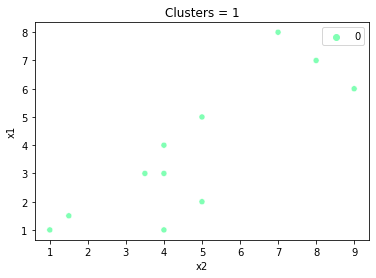

In [6]:
hierarchical_clustering(data, 'single', 1)

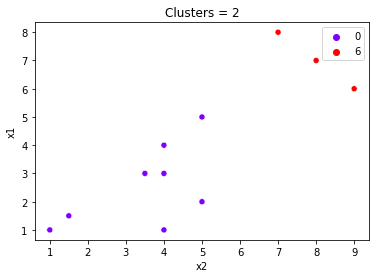

In [7]:
hierarchical_clustering(data, 'single', 2)

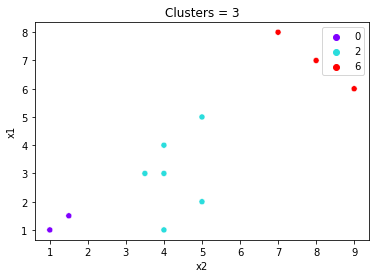

In [8]:
hierarchical_clustering(data, 'single', 3)

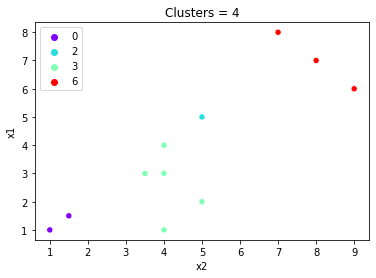

In [9]:
hierarchical_clustering(data, 'single', 4)

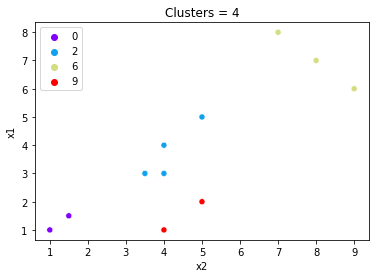

In [10]:
hierarchical_clustering(data, 'average', 4)

#### **Let's try it on bigger dataset**

In [11]:
df2 = pd.read_csv('Hierarchical_clustering_data.csv')
df2.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


In [24]:
df2.shape

(500, 2)

### **Single linkage**

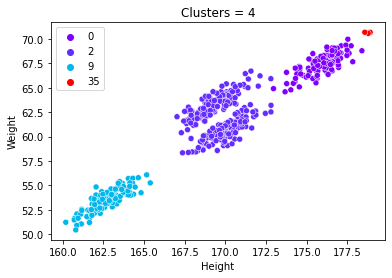

In [12]:
hierarchical_clustering(df2, 'single', 4)

### **Complete linkage**

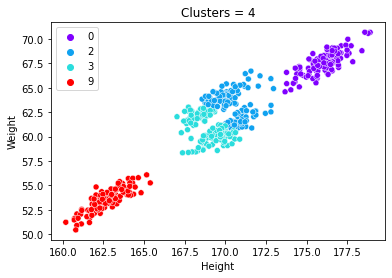

In [13]:
hierarchical_clustering(df2, 'complete', 4)

### **Average linkage**

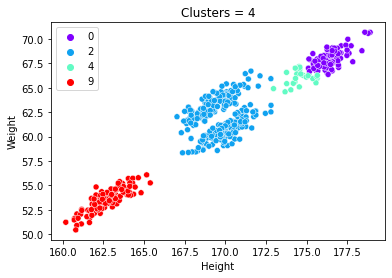

In [14]:
hierarchical_clustering(df2, 'average', 4)